# Deterministic Decision Problems: Search algorithms

## Problem: Fibonacci walks
We move forward along a line crossing $N$ points, starting from $0$ and ending in $N$.
Possible movements are `walk` or `jump`, each with a specific cost. In particular, `walk` costs always $1$ and `jump` costs always $2$.

By walking, we move from the point $i$ to the next point $i+1$. By jumping, we jump from the current point $i$ to the next point $j : j > i$ that is in the Fibonacci series from $0$ to $N$. If such a point does not exists, we move to the next point $i+1$.

We need to find the minimum cost to reach $N$.

- **state**: $s_i \in \{0, \dots, N\}$
- **actions**: $\{w, j\}$
- **cost**: $cost(s, a) = 1$ if $a=w$; $cost(s, a) = 2$ if $a=j$
- **successor**: $successor(s_i, a)$
    - If $a = w$ move to the next char $s_i + 1$ 
    - If $a = j$ move to $s_j : s_j = \min(fibonacci(s_i+1, N)$ if $s_j$ exists and $s_j \leq N$; move to $s_{i}+1$ otherwise
- **end state**: $end(s) = true$ if $s = N$
- **goal**: minimize cost

## Model

In [1]:
from models import FibonacciWalk

In [26]:
model = FibonacciWalk(5)

### Visualize

In [27]:
import utils
import matplotlib.pyplot as plt
import networkx as nx

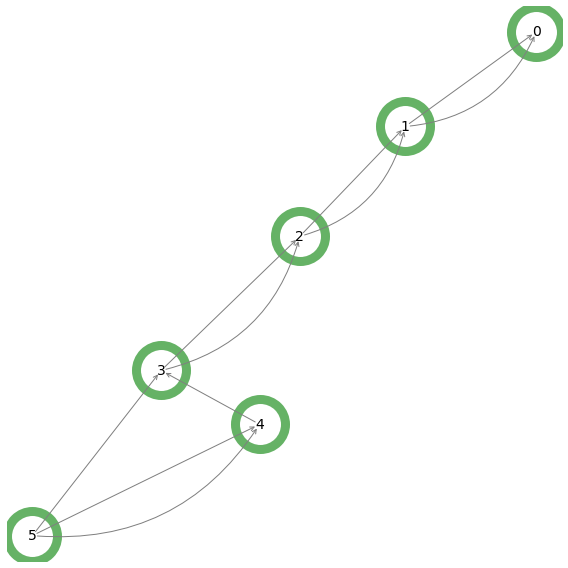

In [28]:
S = utils.to_graph(model, multi=True)
pos = nx.spring_layout(S)
fig, ax = plt.subplots(figsize=(8, 8))
utils.draw_multi_graph(S, ax=ax, pos=pos)
plt.axis('off')
plt.tight_layout()
plt.show()

In [29]:
G = utils.to_action_graph(model)
pos = utils.hierarchy_pos(G)

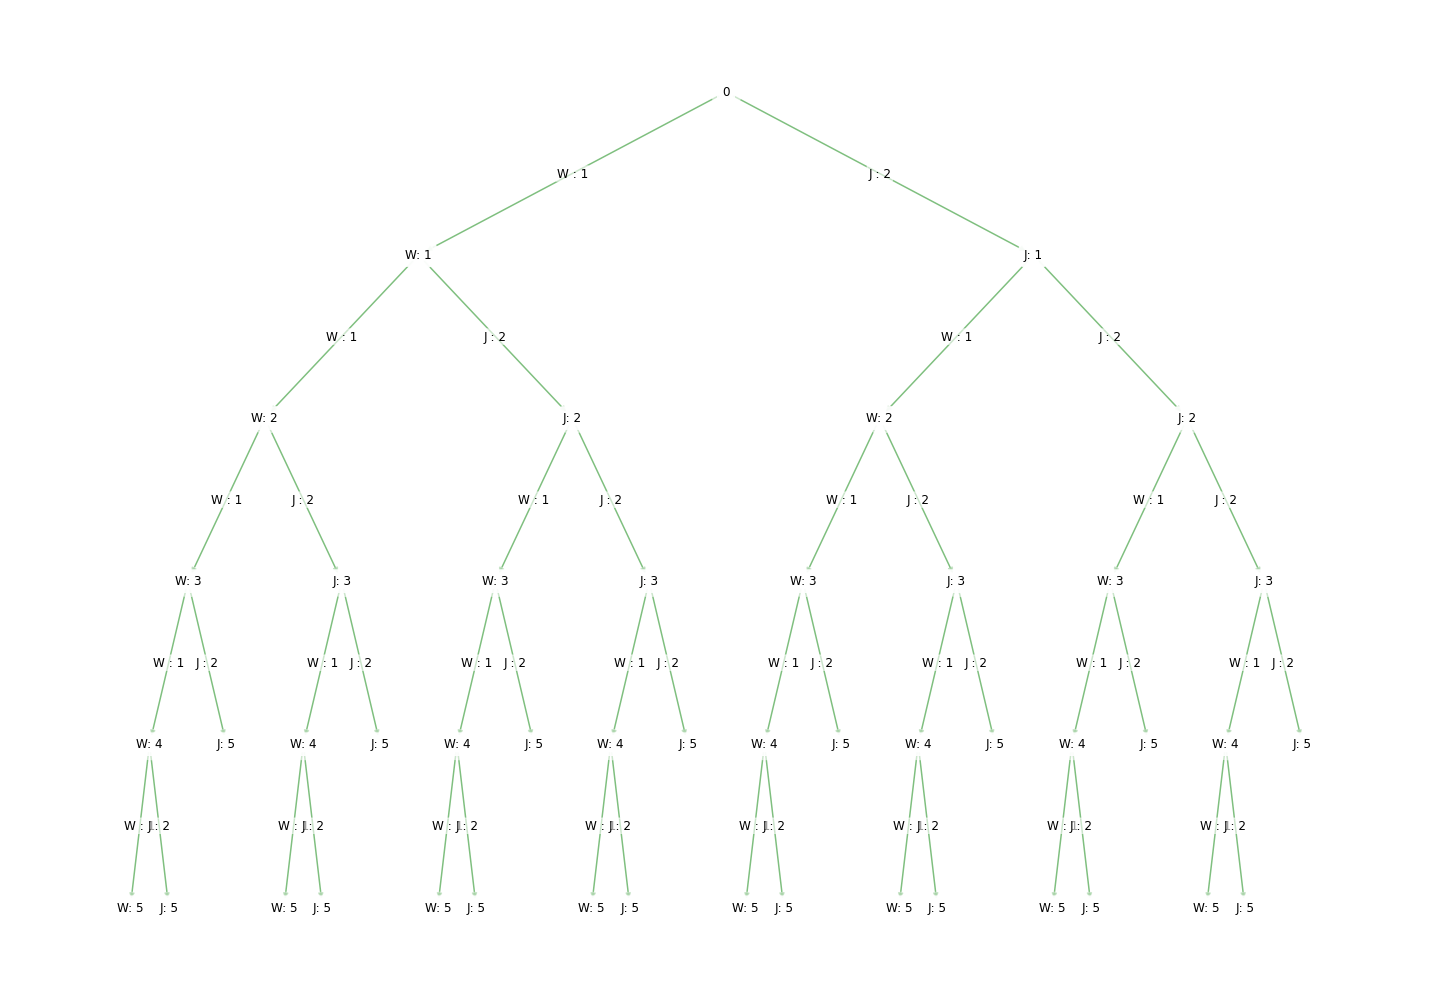

In [30]:
bb = dict(boxstyle="round, pad=0.1", fc="white", ec="white", alpha=0.6, mutation_scale=10)
bbn = dict(boxstyle="round, pad=0.4", fc="w", ec="white", alpha=0.9, mutation_scale=10)

fig, ax = plt.subplots(figsize=(20, 14))
utils.draw_graph(graph=G, pos=pos, ax=ax, 
                 font_size=12, 
                 node_size=1000, 
                 box=bb, box_node=bbn,
                 node_font_color='black',
                 node_line=0,
                 edge_font_color='black')
plt.axis('off')
plt.tight_layout()
plt.show()

## Backtracking Search
Memory $O(N)$, Time: $O\left(b^N\right)$

with $b$ being the number of action per state and $N$ the depth of the search tree

In [22]:
import pandas as pd
from IPython.display import display
import numpy as np

In [23]:
from algorithms import backtracking_search

In [31]:
model = FibonacciWalk(12)

In [32]:
solutions, costs = backtracking_search(model)

In [33]:
best = np.argmin(costs)
plan = pd.DataFrame(solutions[best], columns=['action', 'next state', 'cost'])
display(plan)
print('Total cost', plan.cost.sum())

,action,next state,cost
0,W,1,1
1,W,2,1
2,W,3,1
3,W,4,1
4,W,5,1
5,J,8,2
6,W,9,1
7,W,10,1
8,W,11,1
9,W,12,1


Total cost 11


## Recursive dynamic programming
$$
future(s) = \left\{ \begin{array}[ll]
0 & s\ \textrm{is the terminal state}\\
\min_{a}  [ cost(s, a) + future(successor(s, a)) ] & \textrm{otherwise}
\end{array}\right.
$$

Future cost of actions depends exclusively from the state $s$. We can save time and space then by keeping an index of the optimal cost payed for reaching $s$ and re-use this any time we end in state $s$ again.

**Note**. This need the graph induced by `actions(state)` and `successor(state, action)` to be **acyclic**

In [34]:
from algorithms import dynamic_programming

In [35]:
best_cost = dynamic_programming(model)

In [36]:
best_cost

11

## Uniform Cost Search
Requires positive costs but support cycles in graphs

$O(s \log s)$ with $s$ being the number of states closer to end

In [37]:
from algorithms import uniform_cost_search

In [38]:
path = uniform_cost_search(model)

### Show output

In [39]:
import pandas as pd

In [40]:
P = pd.DataFrame(path, columns=['from', 'to', 'action', 'pcost', 'ncost'])
P['cost'] = P.pcost + P.ncost

In [41]:
P.head(3)

,from,to,action,pcost,ncost,cost
0,0,1,W,0,1,1
1,0,1,J,0,2,2
2,1,2,W,1,1,2


In [44]:
P[P.to==12].sort_values('cost', ascending=True).head(5)

,from,to,action,pcost,ncost,cost
165,11,12,W,10,1,11
167,11,12,W,10,1,11
199,11,12,W,11,1,12
197,11,12,W,11,1,12
195,11,12,W,11,1,12
